In [9]:
import pandas as pd
import warnings
from functions import *
import matplotlib.pyplot as plt

# Suppress warnings
warnings.filterwarnings('ignore')

In [10]:
# Read the data
df1 = read_excel('idtobank.xlsx')
df2 = read_excel('hashtoid.xlsx')
fraud_data = read_excel('fraud.xlsx', sheet_name='Detail data')

df1 = preprocess_dataframe(df1)
df2 = preprocess_dataframe(df2)

df = pd.concat([df1, df2], ignore_index=True)
fraud_ids = fraud_data['customer_id'].unique()
df['is_fraud'] = df['customer_id'].isin(fraud_ids).astype(object)
df['amount'] = pd.to_numeric(df['amount'], errors='coerce')

describe_dataframe(df)

Number of rows: 4063
Number of columns: 57

Column names and data types:
success_redirect_url                object
account_details                     object
expires_at                          object
client                              object
fee                                 object
refunded_amount                     object
payment_channel_transaction_id      object
linked_account_id                   object
is_otp_required                     object
otp_mobile_number                   object
settlement_date                     object
failure_code                        object
callback_url                        object
status                              object
channel_account_reference           object
updated                             object
version                             object
checkout_url                        object
vat                                 object
client_type                         object
id                                  object
status2                 

In [17]:
# Dictionary for token mapping
token_mapping = {
    'account_hash': 'a_h ',
    'customer_id': 'c_id ',
    'end_customer_id': 'e_c_id ',
    'email': 'e'
}

# Factorize and map columns
df, factorized_to_original, token_to_original = factorize_and_map(df, token_mapping)


# Example: Get original value from token-mapped value
get_original_value_from_token('a_h 0', token_to_original)

pd.set_option('display.max_columns', None)

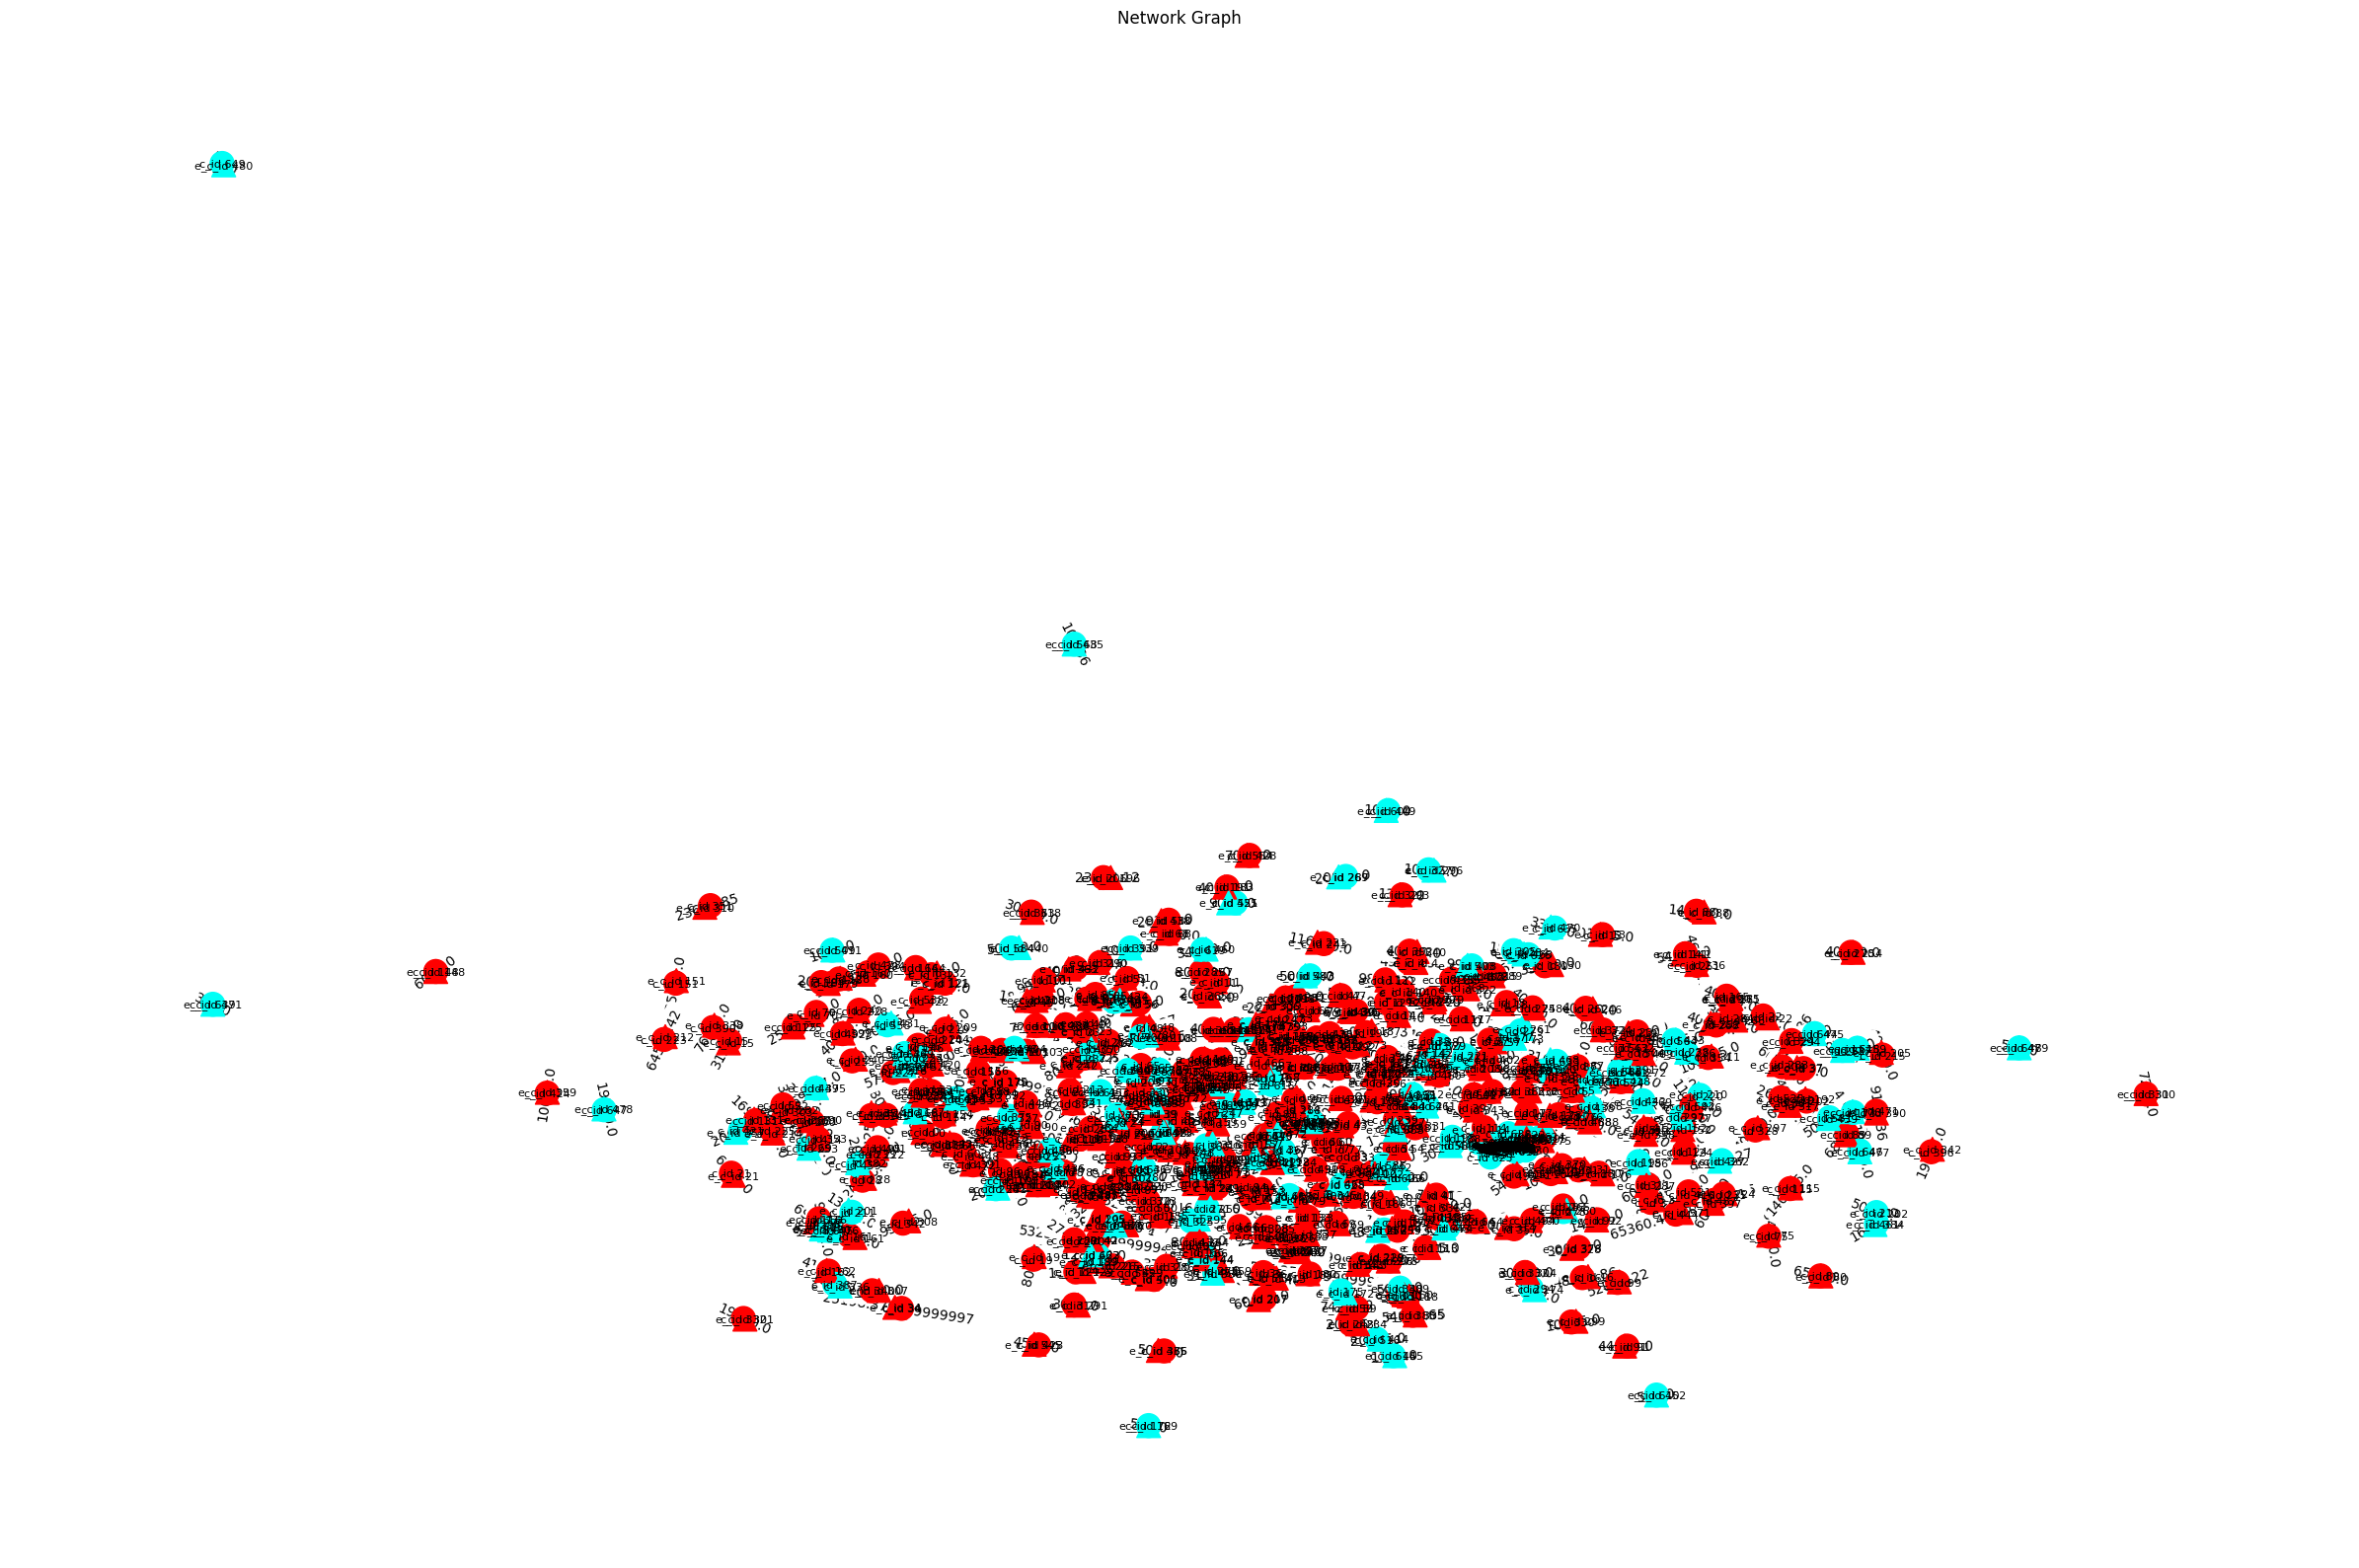

In [14]:
# Initialize the network graph
nodes = ['customer_id', 'end_customer_id']
node_attributes = ['account_hash','is_fraud', 'email','surname']
edges = ['amount']

G = create_and_plot_network(df, nodes, edges, 'is_fraud', node_attributes)

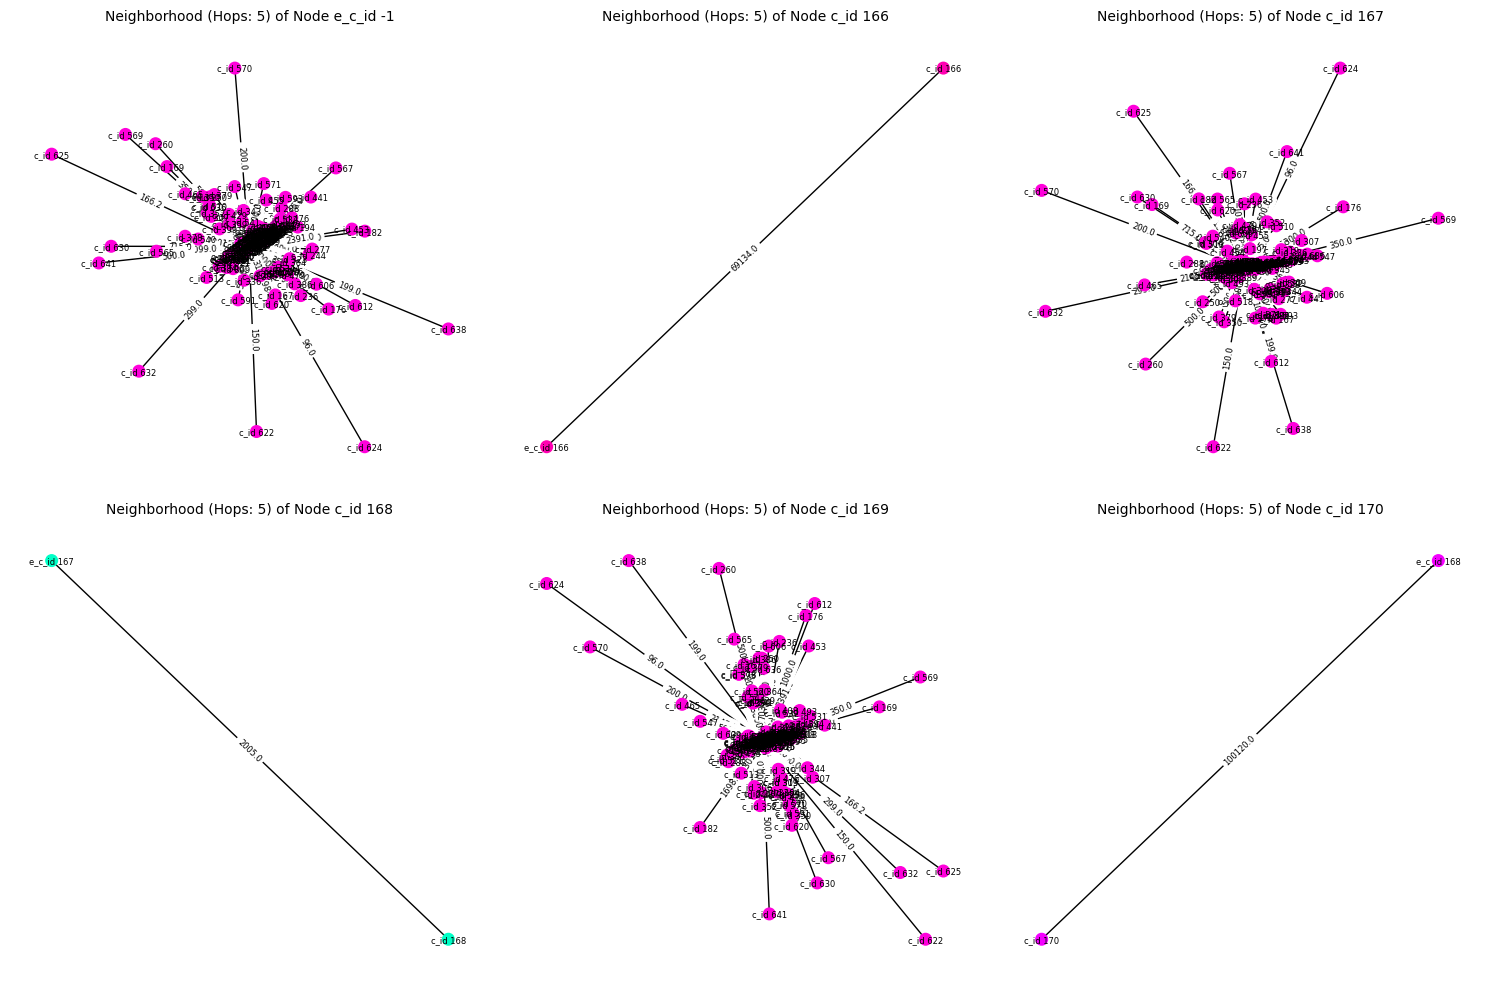

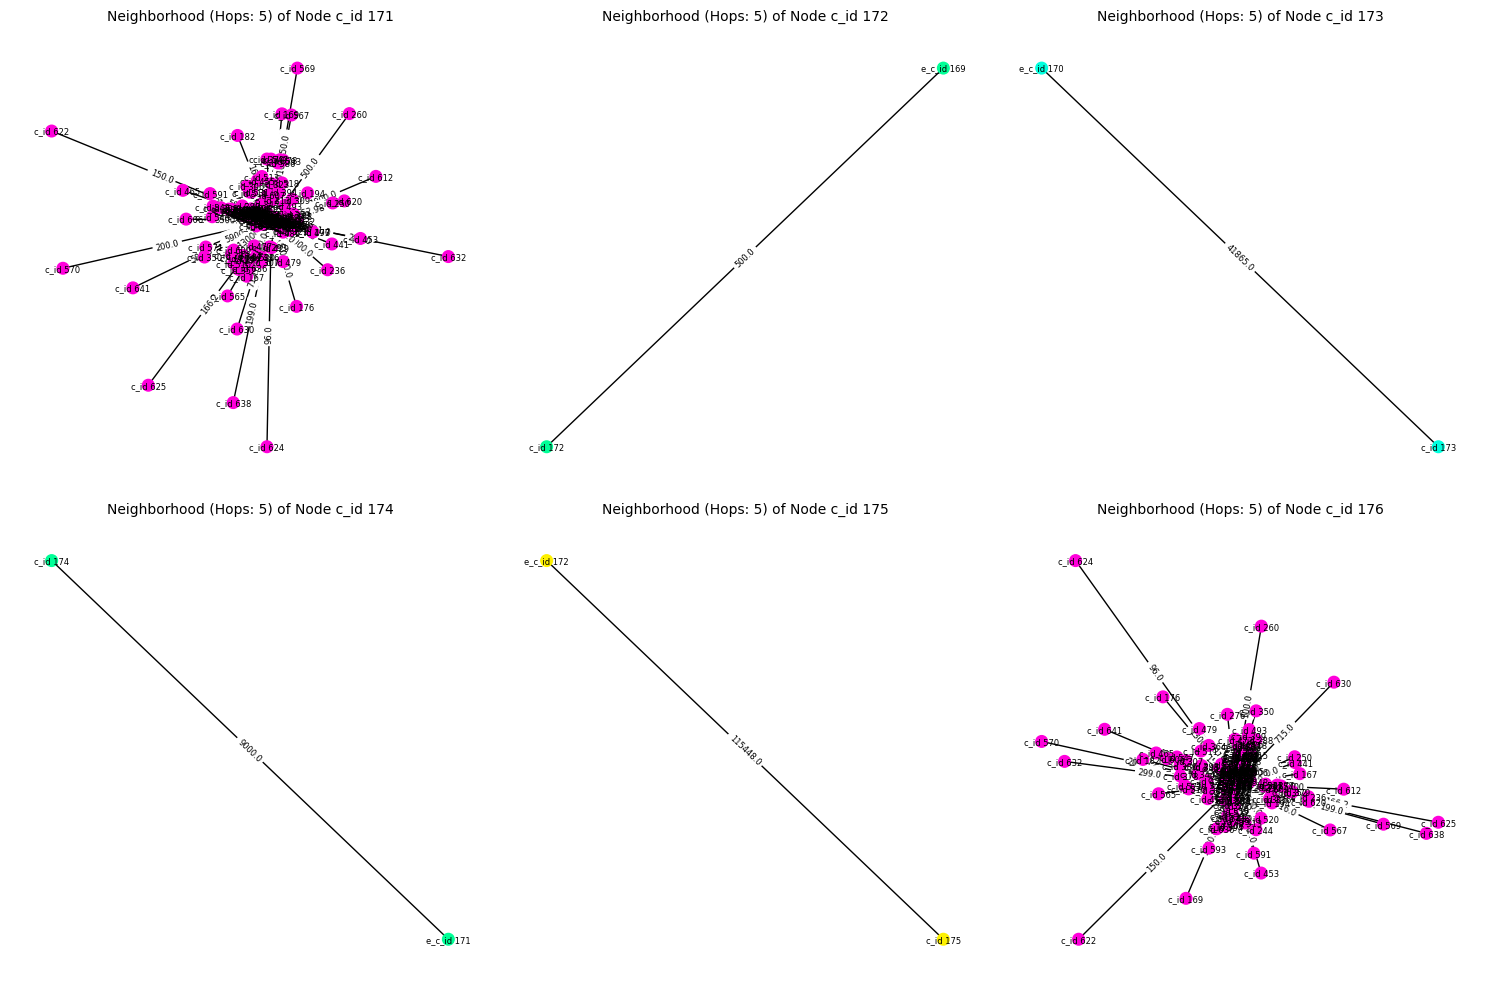

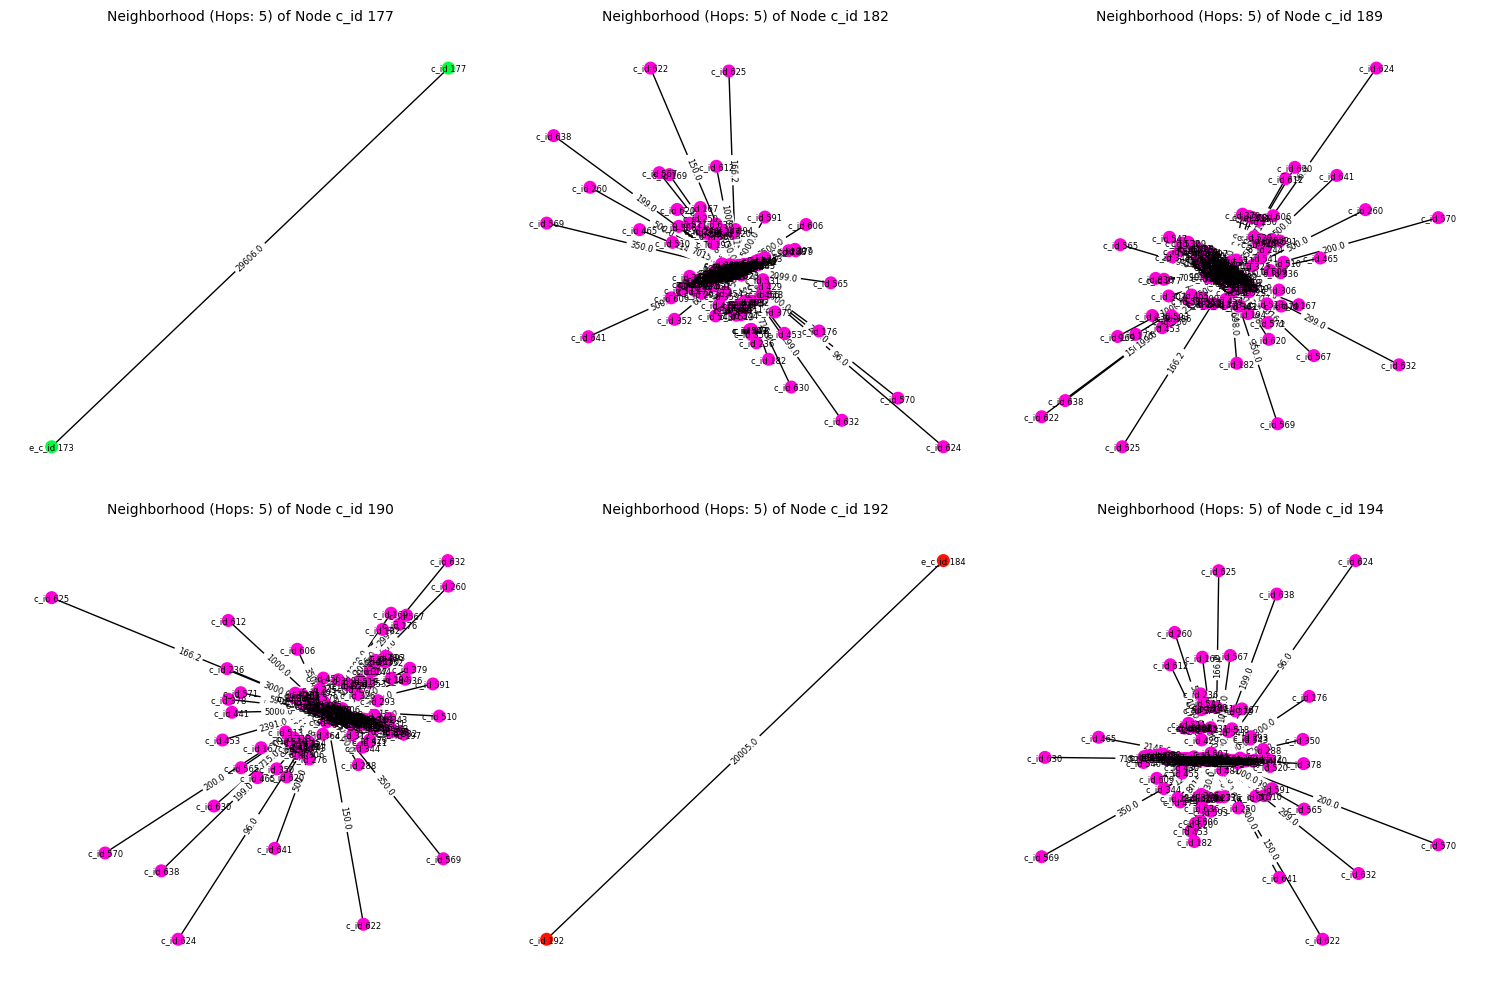

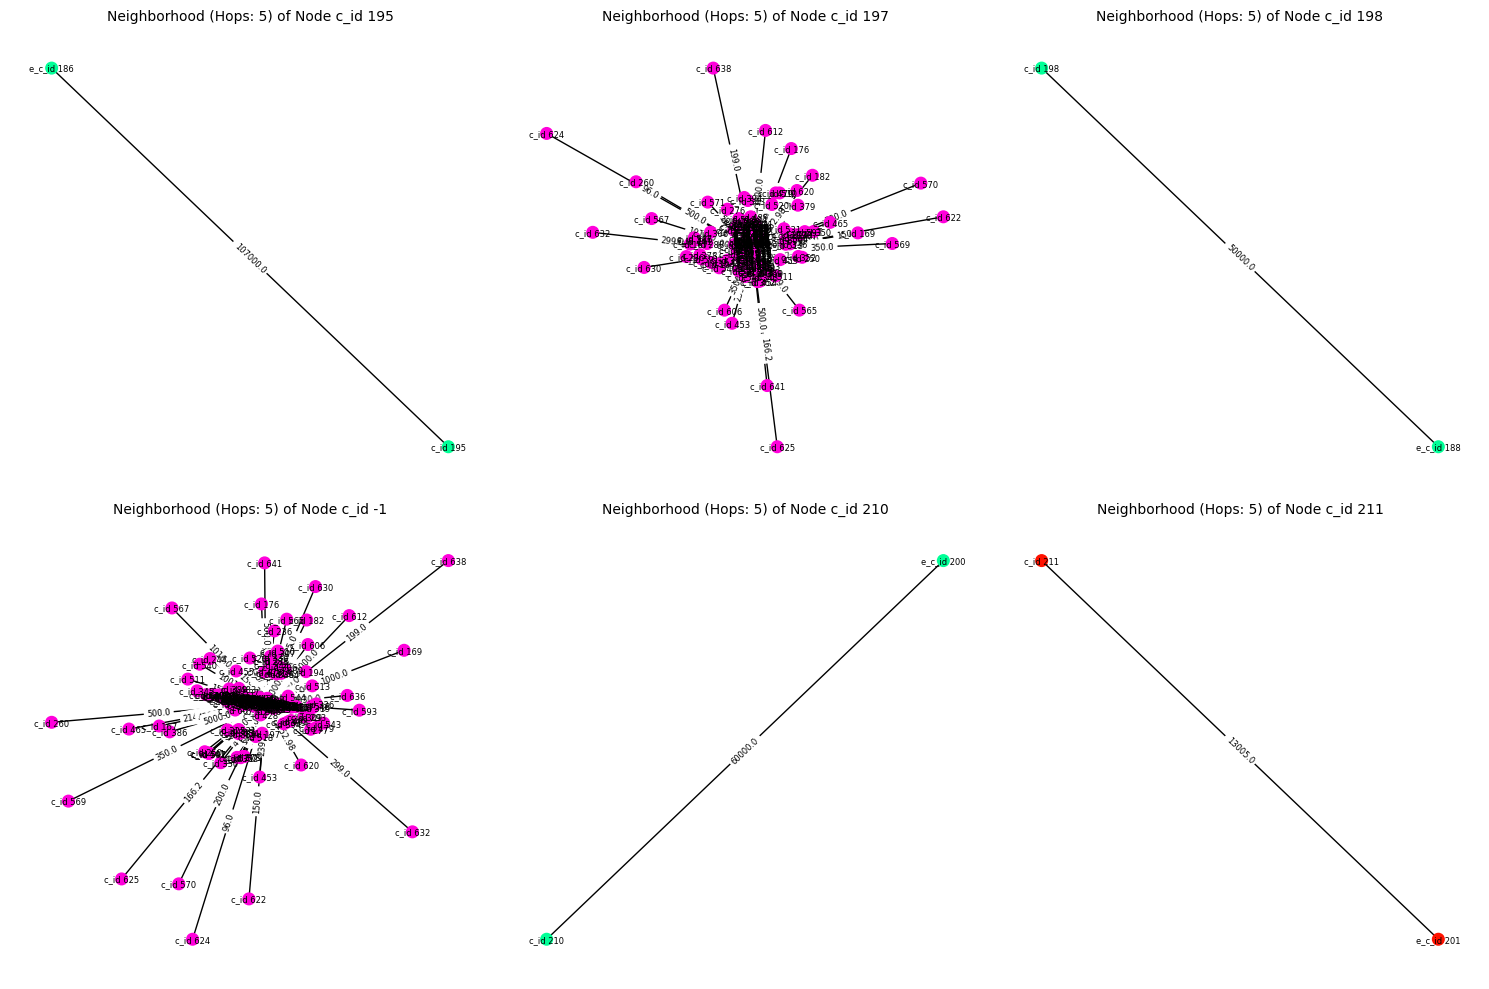

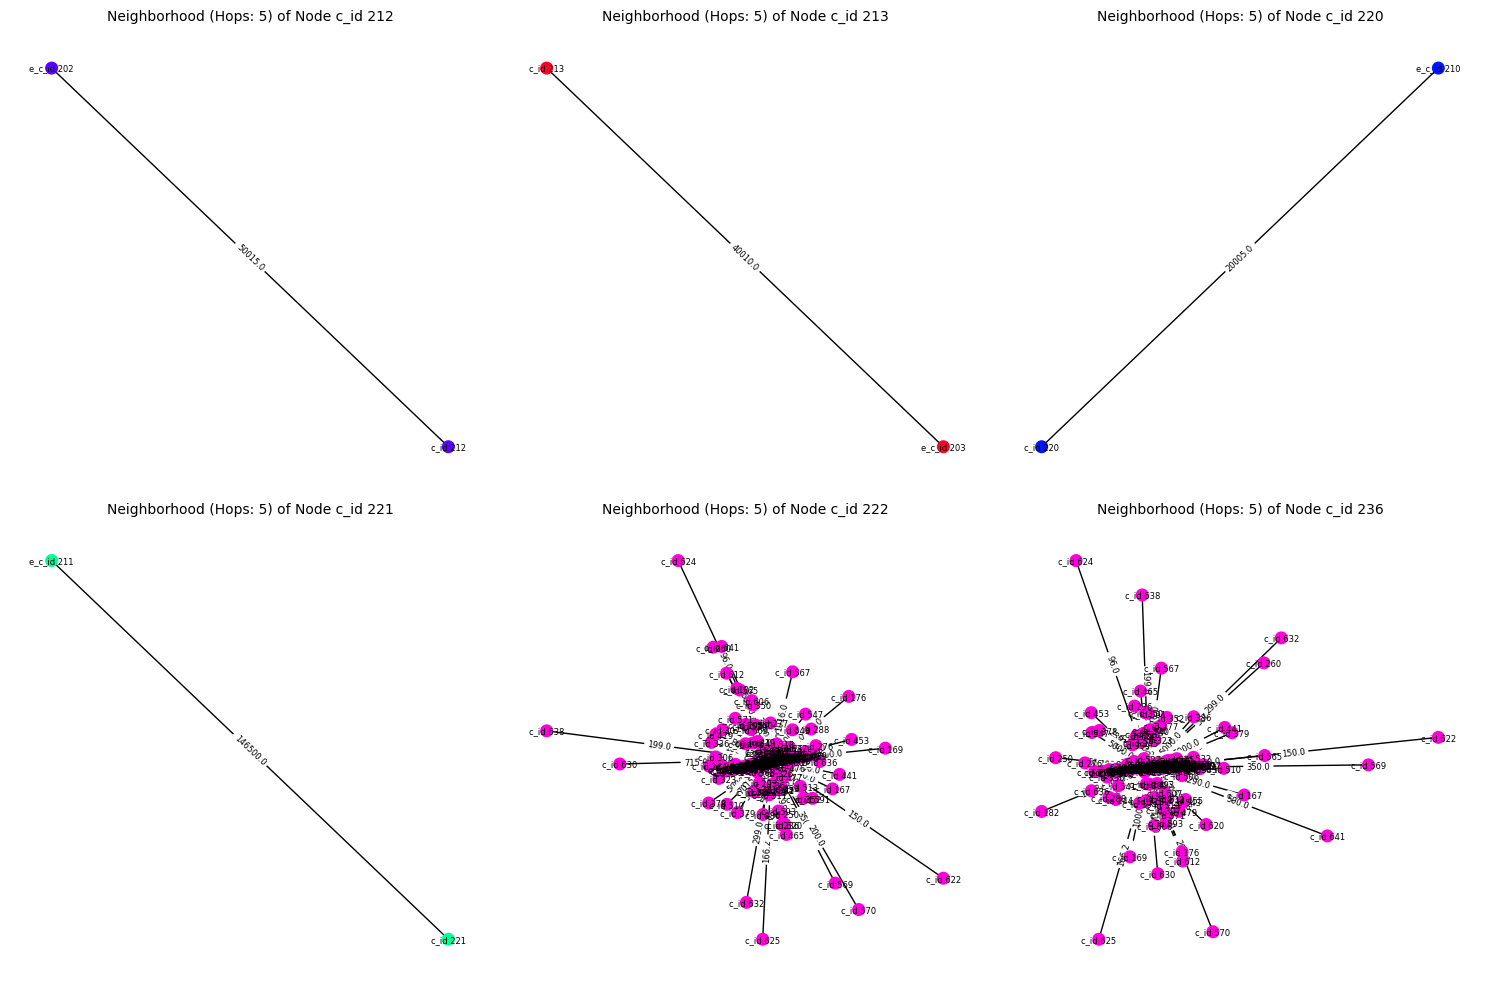

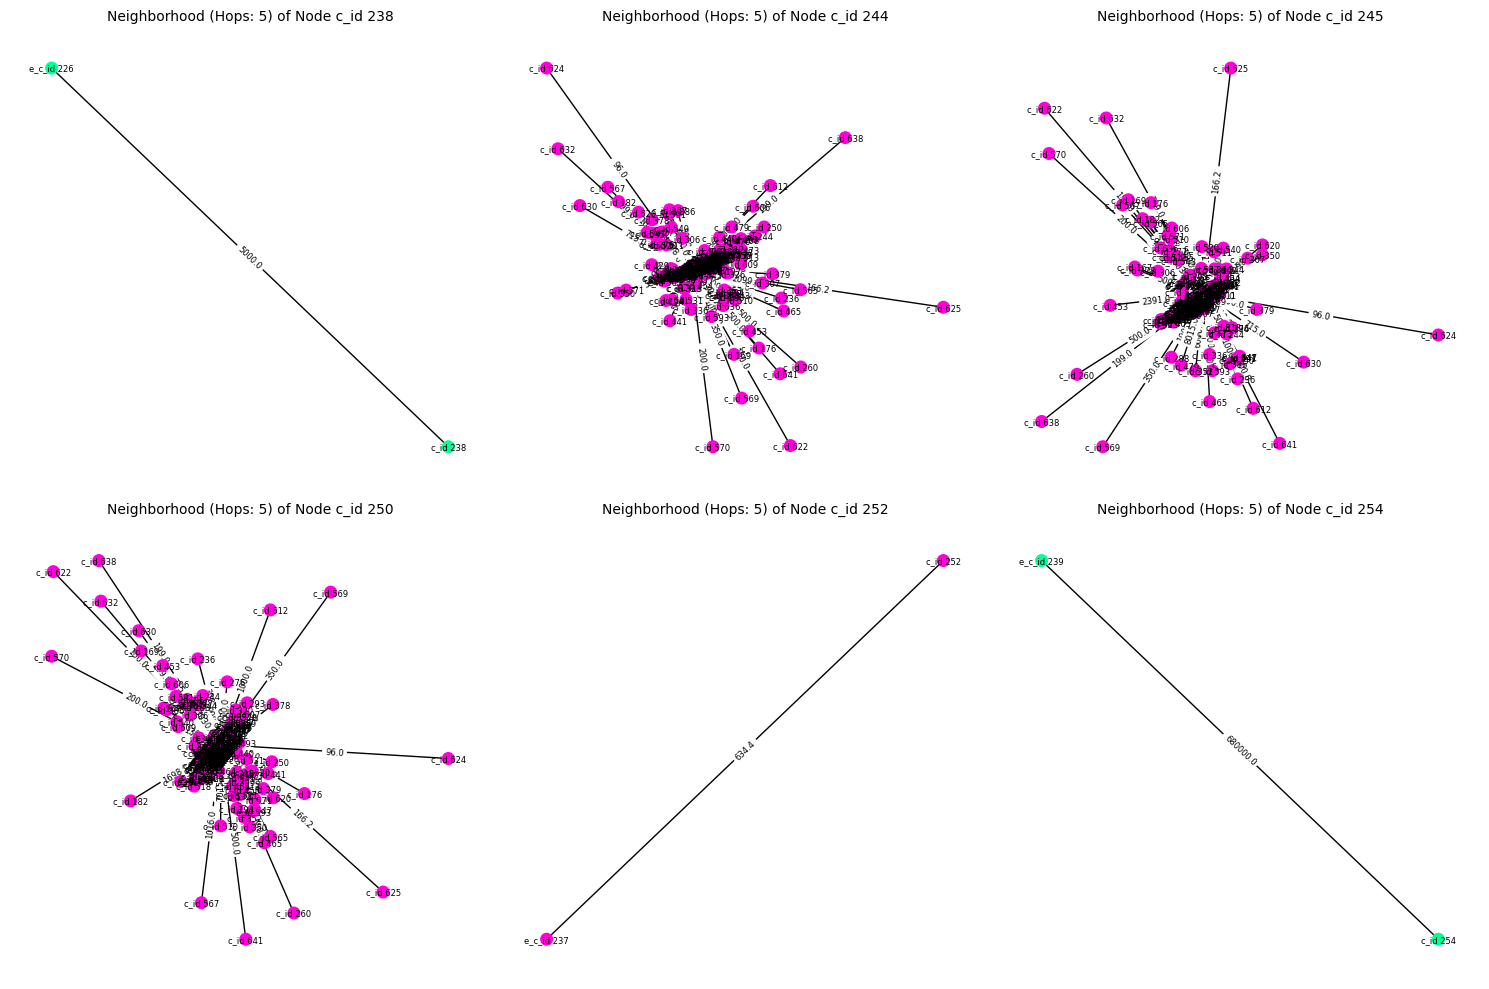

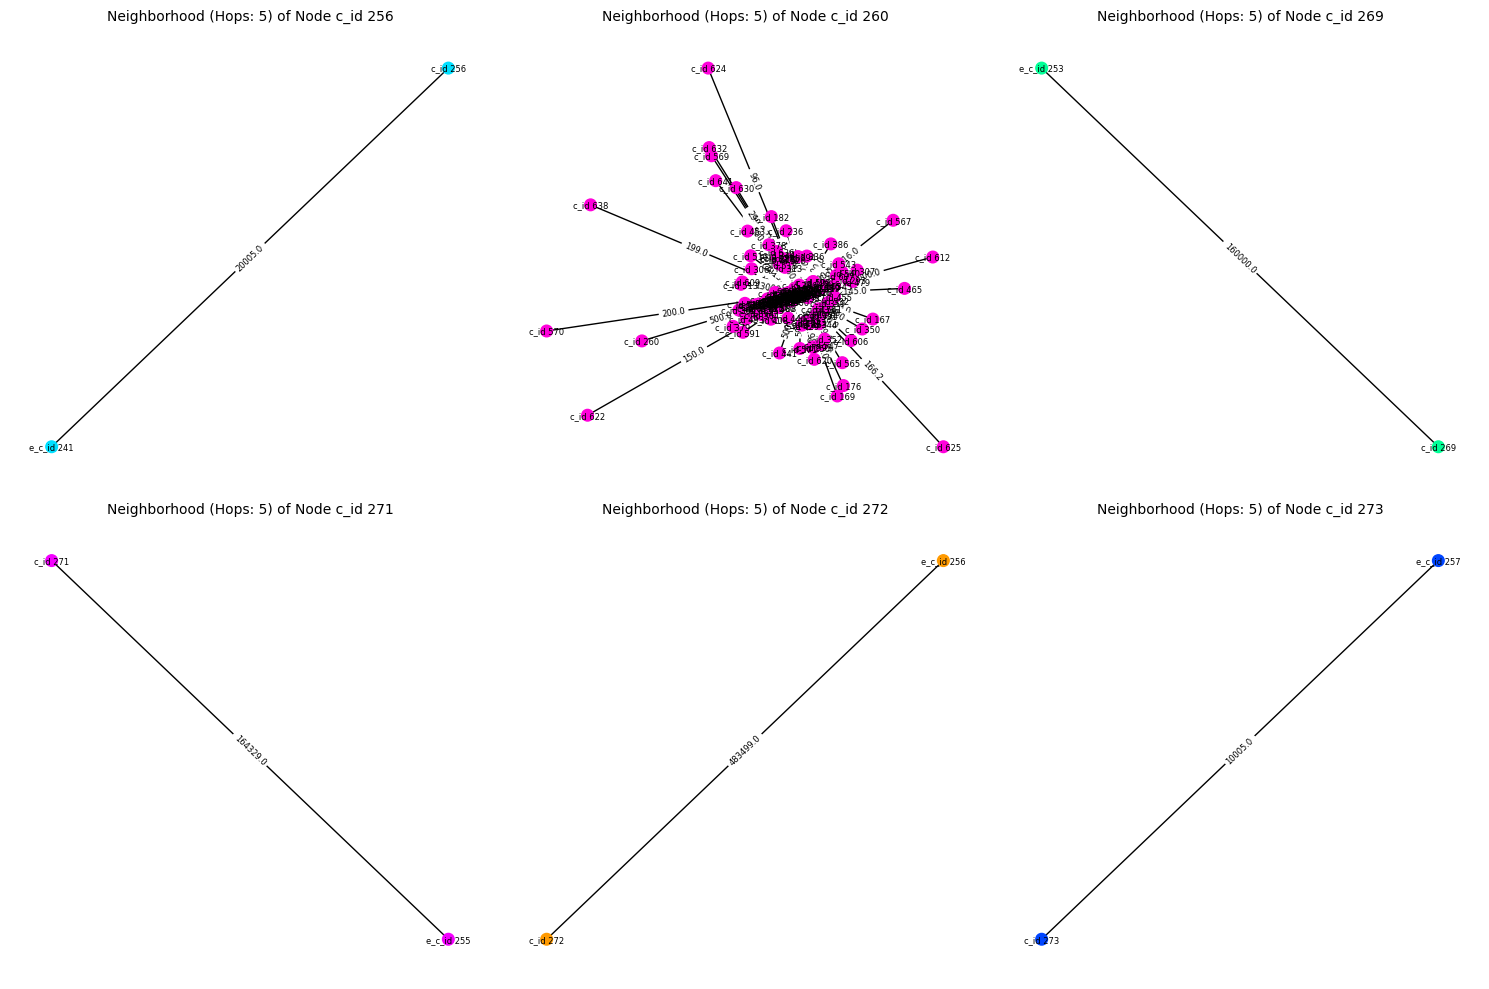

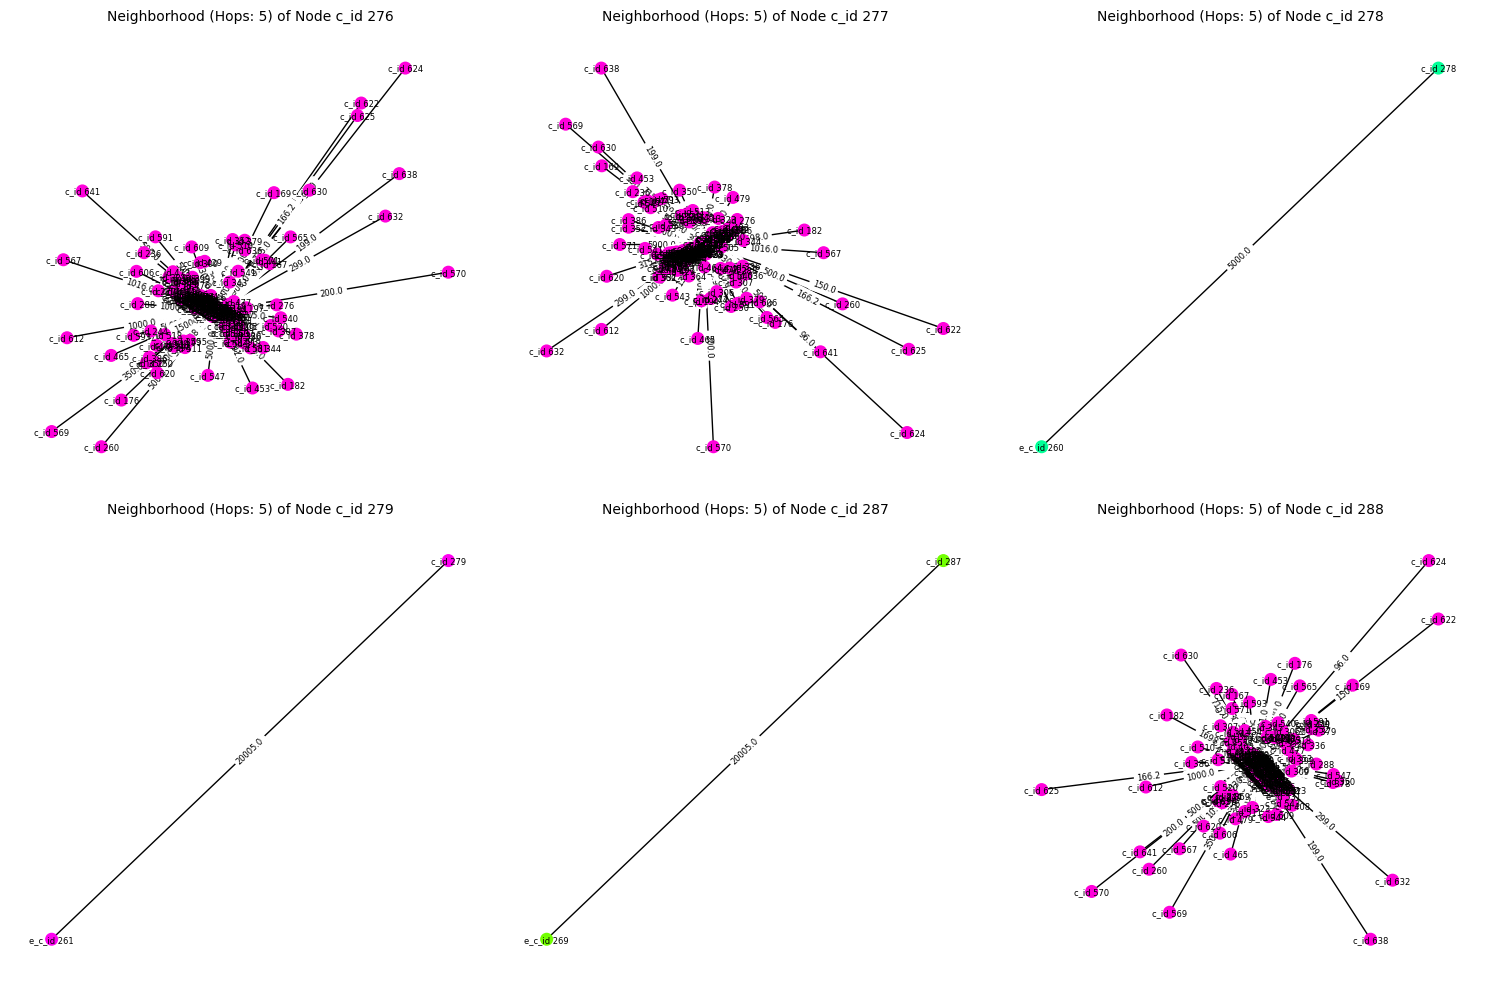

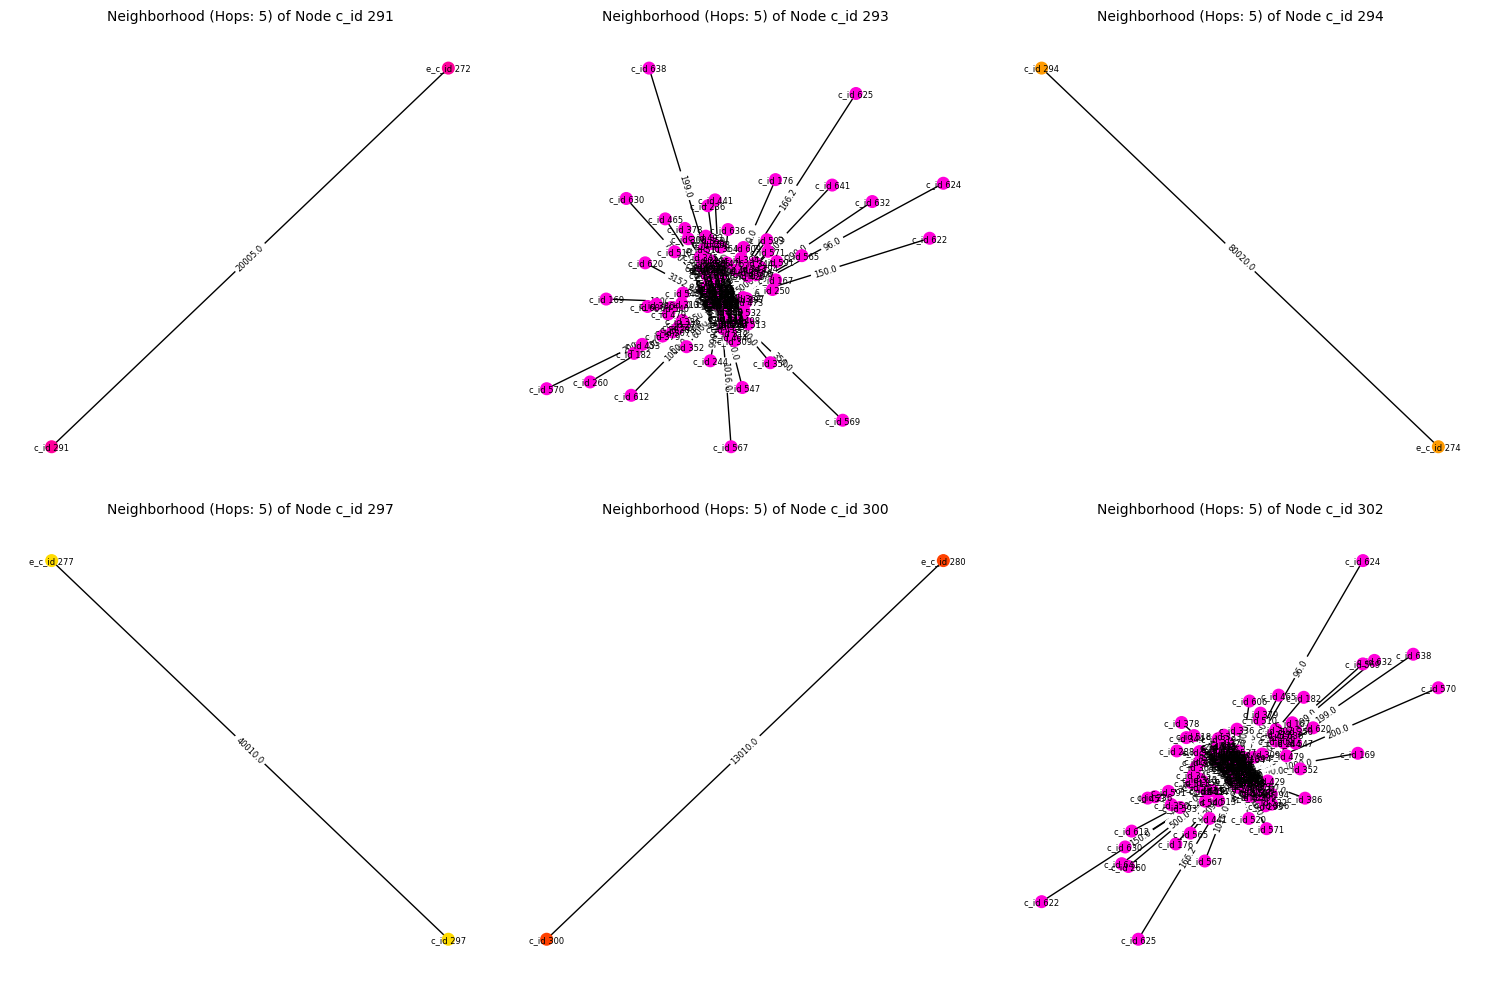

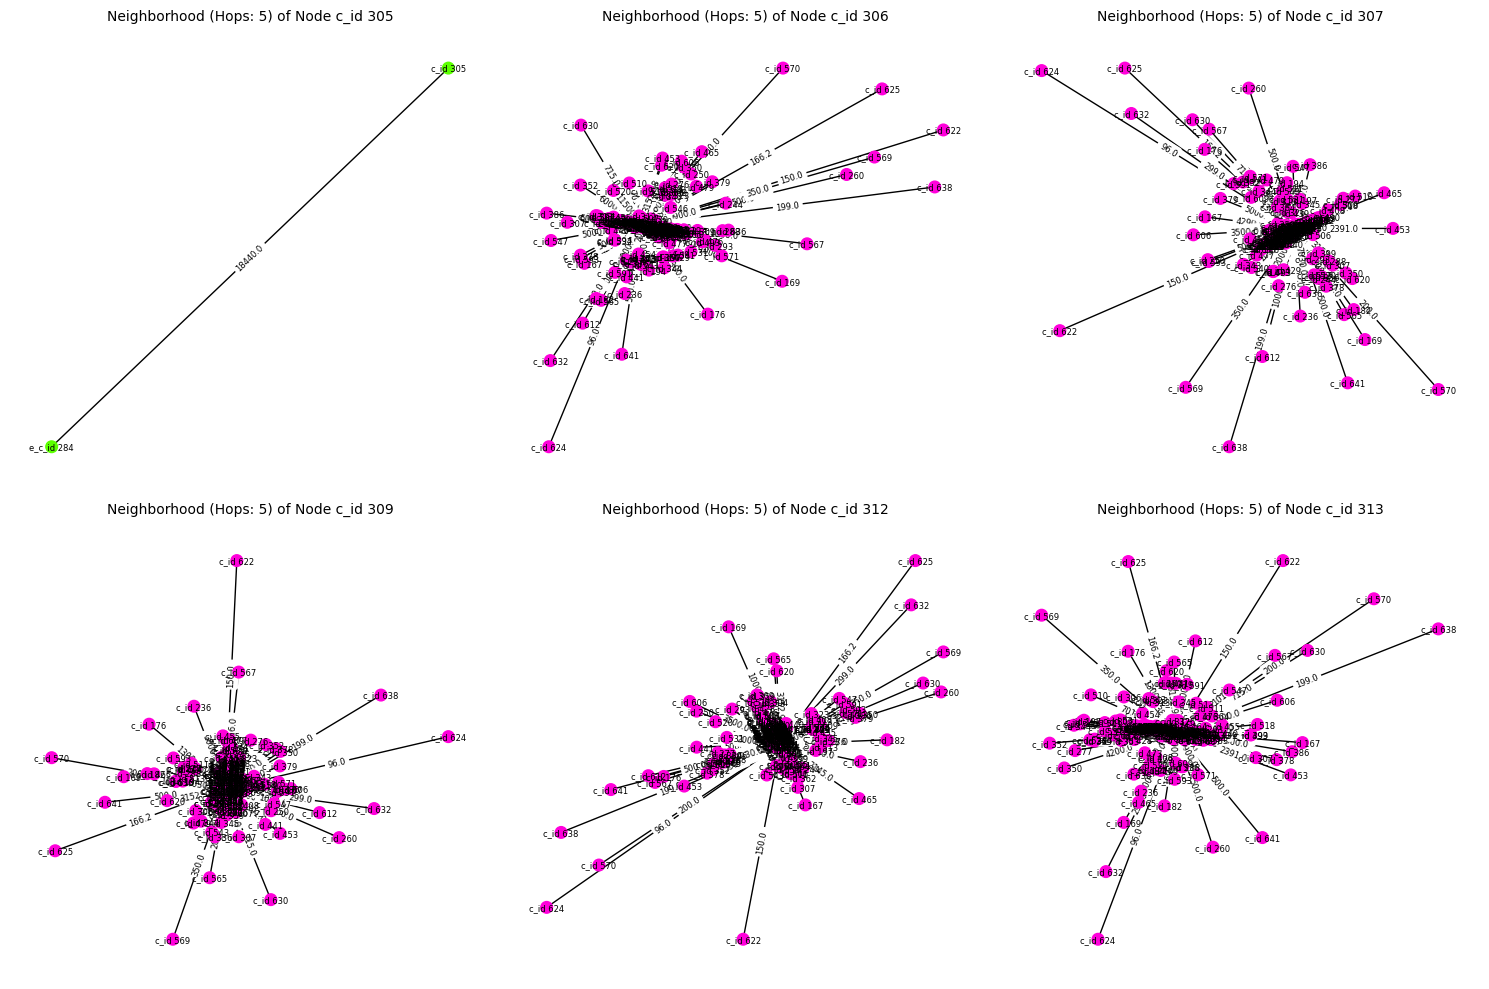

In [22]:
# Filter the graph by attributes
attr_filters = {'is_fraud': False}
filtered_G = filter_graph_by_attributes(G, attr_filters)

# Print filtered nodes
plot_subgraphs(filtered_G,num_hops=5)